# setup

In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
BATCH_SIZE = 256

# data

In [5]:
H_rn18 = torch.load('output/rn18_H_val.pt')[:, :, 0, 0]
H_rn34 = torch.load('output/rn34_H_val.pt')[:, :, 0, 0]

# mse

In [6]:
H_rn18.shape, H_rn34.shape

(torch.Size([50000, 512]), torch.Size([50000, 512]))

In [45]:
loss = torch.nn.MSELoss(reduction = 'none')

mse = loss(H_rn18, H_rn34)

In [49]:
delta = torch.sum(mse, dim = 1)
torch.mean(delta)

tensor(870.9800)

In [47]:
delta

tensor(1114.6261)

In [62]:
delta.shape[0]

50000

In [58]:
delta[0] / torch.linalg.vector_norm(H_rn34[0])

tensor(36.3711)

In [65]:
norm = [torch.linalg.vector_norm(H_rn34[i]) for i in range(delta.shape[0])]
percentual = delta / torch.Tensor(norm)

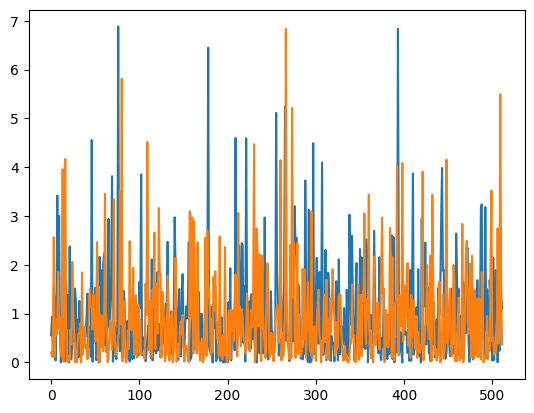

In [69]:
plt.plot(H_rn18[0]);
plt.plot(H_rn34[0]);

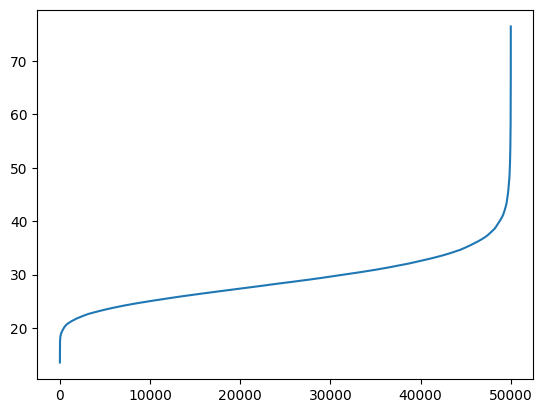

In [68]:
plt.plot(np.sort(percentual));

# sim

In [72]:
N = 100
sample = np.random.choice(H_rn18.shape[0], N)
h_rn18 = H_rn18[sample, :]
h_rn34 = H_rn34[sample, :]

In [73]:
h_rn18 /= h_rn18.norm(dim=-1, keepdim=True)
h_rn34 /= h_rn34.norm(dim=-1, keepdim=True)
similarity = h_rn18.numpy() @ h_rn34.numpy().T

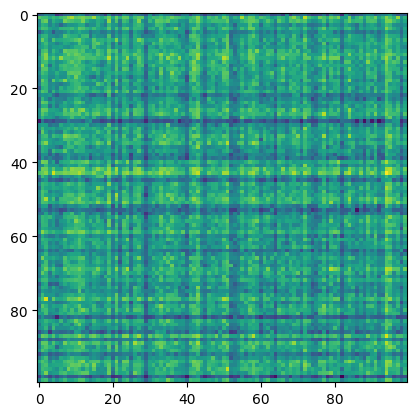

In [75]:
plt.imshow(similarity);